In [1]:
import sys
import os
from pathlib import Path

# Adiciona o diretório raiz do projeto ao Python path
project_root = Path.cwd().parent  # Ajuste conforme sua estrutura
sys.path.append(str(project_root))

# Agora importe normalmente
from src.core.ml.leak_detection import LeakDetector

# Teste o detector
detector = LeakDetector()
print("LeakDetector importado com sucesso!")

Carregando modelo existente...
LeakDetector importado com sucesso!


In [2]:
import pandas as pd
import numpy as np

meus_dados = pd.DataFrame({
    # --- OBRIGATÓRIO ---
    'timestamp': pd.date_range(start='2024-01-01 10:00:00', end='2024-01-02 10:00:00', periods=500),
    'pressure': np.concatenate([
        np.random.normal(80, 3, 400),      # Operação normal
        np.random.normal(55, 8, 100)       # Possível vazamento
    ]),
    'flow_rate': np.concatenate([
        np.random.normal(100, 5, 400),     # Operação normal  
        np.random.normal(80, 15, 100)      # Queda de vazão
    ]),
    'temperature': np.random.normal(25, 2, 500),
    'pipeline_id': ['gasoduto_norte'] * 500,
    'location': ['estacao_compressao'] * 500,
    
    # --- OPCIONAL (melhora a detecção) ---
    'vibration': np.random.normal(5, 1.5, 500),        # Em mm/s
    'equipment_type': ['pipeline'] * 500,              # Tipo de equipamento
    'operational_status': ['normal'] * 500             # Status operacional
})

In [3]:
data_path = project_root / "data" / "synthetic" / "generated" / "gas_operation_data.parquet"

# Com caminho customizado
detector = LeakDetector(
    model_path="models/leak_detector.joblib",
    # data_path=data_path
)

# Detectar vazamentos
results = detector.detect_leaks_batch(meus_dados)

# Avaliar modelo
metrics = detector.evaluate_model()

Carregando modelo existente...
Vazamentos detectados: 0/500 (0.0%)
Carregando dados de: C:\Users\marco\OneDrive\Área de Trabalho\Hackathon\digital-twin-gas\backend\data\synthetic\generated\gas_operation_data.parquet
Dados carregados: 50000 amostras
Feature pressure_drop não encontrada, preenchida com 0
Feature flow_variation não encontrada, preenchida com 0
Feature temp_change não encontrada, preenchida com 0
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       819
           1       0.00      0.00      0.00       181

    accuracy                           0.82      1000
   macro avg       0.41      0.50      0.45      1000
weighted avg       0.67      0.82      0.74      1000



c:\Users\marco\OneDrive\Área de Trabalho\Felipe\VENTURI\SOFTWARE\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\marco\OneDrive\Área de Trabalho\Felipe\VENTURI\SOFTWARE\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\marco\OneDrive\Área de Trabalho\Felipe\VENTURI\SOFTWARE\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` par

In [6]:
results.operational_status.unique()

array(['normal'], dtype=object)

Vazamentos detectados: 0
Probabilidade média: nan%


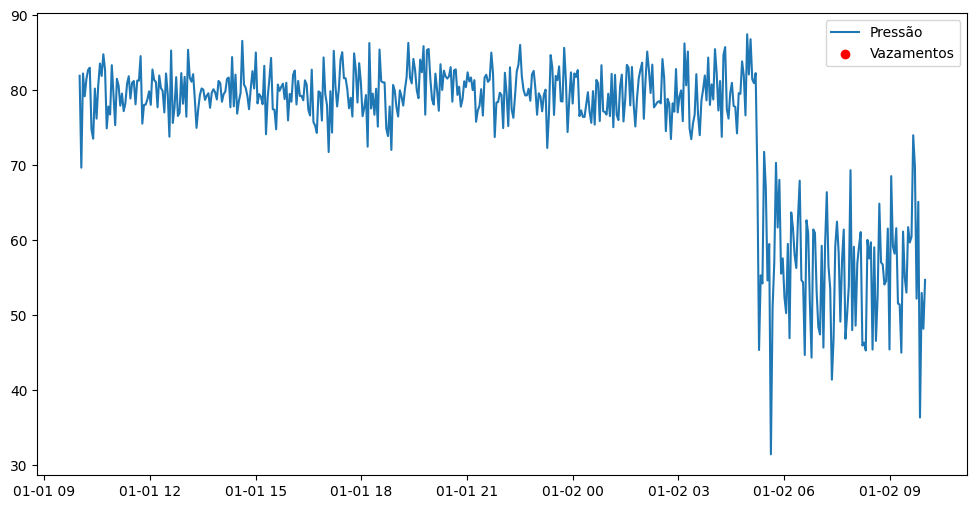

In [5]:
# Analisa os resultados
vazamentos = results[results['leak_alert'] == True]
print(f"Vazamentos detectados: {len(vazamentos)}")
print(f"Probabilidade média: {vazamentos['leak_probability'].mean():.1%}")

# Visualiza os resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(results['timestamp'], results['pressure'], label='Pressão')
plt.scatter(vazamentos['timestamp'], vazamentos['pressure'], color='red', label='Vazamentos')
plt.legend()
plt.show()